# Load Simple Workflow

## Plot

In [ ]:
from python_workflow_definition.plot import plot

In [ ]:
plot(file_name='workflow_nfdi.json')

## Aiida 

In [1]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='c08748df7ab74ec08c14e5f16cebc987' name='pwd'>

In [2]:
workgraph = load_workflow_json(file_name='workflow_nfdi.json')

In [3]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [4]:

workgraph.run()

03/24/2025 12:15:40 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|continue_workgraph]: tasks ready to run: pickle_node3,pickle_node4
03/24/2025 12:15:49 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 1076, 1083
03/24/2025 12:16:27 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|update_task_state]: Task: pickle_node3, type: PYTHONJOB, finished.
03/24/2025 12:16:28 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|update_task_state]: Task: pickle_node4, type: PYTHONJOB, finished.


invalid state


03/24/2025 12:16:29 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y1
03/24/2025 12:16:35 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 1098
03/24/2025 12:16:58 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|update_task_state]: Task: add_x_and_y1, type: PYTHONJOB, finished.
03/24/2025 12:16:59 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y_and_z2
03/24/2025 12:17:04 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1069|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 1111
03/24/2025 12:17:23 PM <259264> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REP

## executorlib

In [5]:
from executorlib import SingleNodeExecutor

In [6]:
from python_workflow_definition.executorlib import load_workflow_json

In [7]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow_nfdi.json", exe=exe).result()

In [8]:
result

6

## Jobflow

In [9]:
from jobflow.managers.local import run_locally

/home/jan/mambaforge/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/jan/mambaforge/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [10]:
from python_workflow_definition.jobflow import load_workflow_json

In [11]:
flow = load_workflow_json(file_name="workflow_nfdi.json")

In [12]:
result = run_locally(flow)
result

2025-03-24 12:17:31,659 INFO Started executing jobs locally
2025-03-24 12:17:33,059 INFO Starting job - add_x_and_y (a8004d81-a7b8-41f1-a673-17b4d6e90ebf)
2025-03-24 12:17:33,061 INFO Finished job - add_x_and_y (a8004d81-a7b8-41f1-a673-17b4d6e90ebf)
2025-03-24 12:17:33,062 INFO Starting job - add_x_and_y_and_z (26ddcedb-34b3-4b09-883d-311b2689d870)
2025-03-24 12:17:33,066 INFO Finished job - add_x_and_y_and_z (26ddcedb-34b3-4b09-883d-311b2689d870)
2025-03-24 12:17:33,070 INFO Finished executing jobs locally


{'a8004d81-a7b8-41f1-a673-17b4d6e90ebf': {1: Response(output={'x': 1, 'y': 2, 'z': 3}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2025/2025-03-22-compare-workflows'))},
 '26ddcedb-34b3-4b09-883d-311b2689d870': {1: Response(output=6, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2025/2025-03-22-compare-workflows'))}}

## pyiron

In [13]:
from pyiron_base import Project

In [14]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [15]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

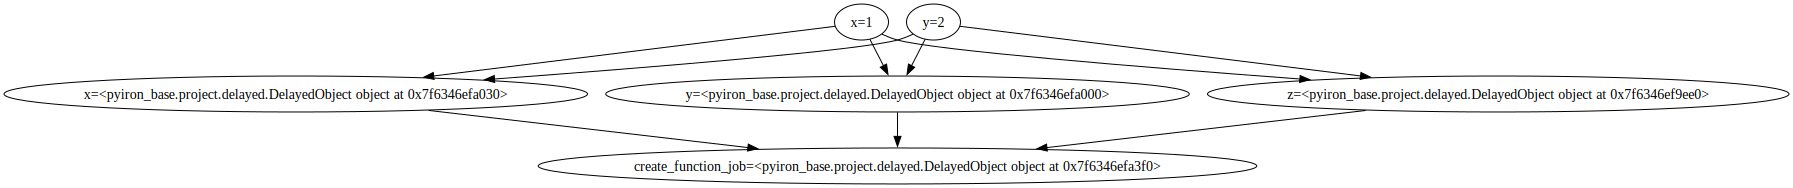

In [16]:
delayed_object = load_workflow_json(project=pr, file_name="workflow_nfdi.json")
delayed_object.draw()

In [17]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 8
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 9


6

In [18]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,8,finished,None,add_x_and_y_68901482a2c5221cc845f828aabebd27,/add_x_and_y_68901482a2c5221cc845f828aabebd27,None,/home/jan/notebooks/2025/2025-03-22-compare-workflows/test/,2025-03-24 12:17:37.412001,None,None,pyiron@p200300e77f488c66bae2561c878c14a2.dip0.t-ipconnect.de#1,PythonFunctionContainerJob,0.4,None,None
1,9,finished,None,add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d,/add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d,None,/home/jan/notebooks/2025/2025-03-22-compare-workflows/test/,2025-03-24 12:17:39.161717,None,None,pyiron@p200300e77f488c66bae2561c878c14a2.dip0.t-ipconnect.de#1,PythonFunctionContainerJob,0.4,None,None


## Python

In [19]:
from python_workflow_definition.purepython import load_workflow_json

In [20]:
load_workflow_json(file_name="workflow_nfdi.json")

6